In [214]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Preparing Data

In [2]:
train=pd.read_csv('train_0OECtn8.csv')

In [3]:
test=pd.read_csv('test_1zqHu22.csv')

In [4]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [6]:
#Computing dimension of train and test data
print('Shape of train data: {}\nShape of test data: {}'.format(train.shape,test.shape))

Shape of train data: (89197, 10)
Shape of test data: (11121, 9)


In [7]:
#Checking datatypes
train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [8]:
#Checking null values
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [9]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

There are no null values in both train and test dataset

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [84]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [85]:
train.describe(include='object')

,gender,profession
count,89197,89197
unique,2,3
top,Male,Student
freq,52397,44638


In [10]:
#Removing insignificant variables
df_tr=train.drop('row_id',axis=1)

In [11]:
df_ts=test.drop('row_id',axis=1)

In [12]:
df_catg=df_tr.select_dtypes(include='object')
df_num=df_tr.select_dtypes(include=[np.number])

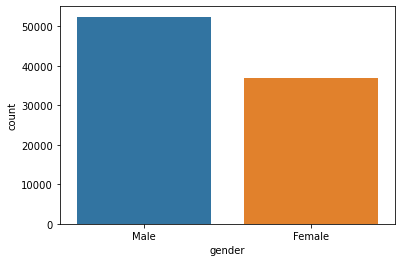

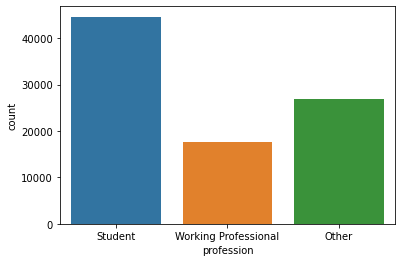

In [13]:
for var in df_catg:
    sns.countplot(df_catg[var])
    plt.show()

Inference: There are more male viewers than females. Students are highest viewers of channel

<function matplotlib.pyplot.show(close=None, block=None)>

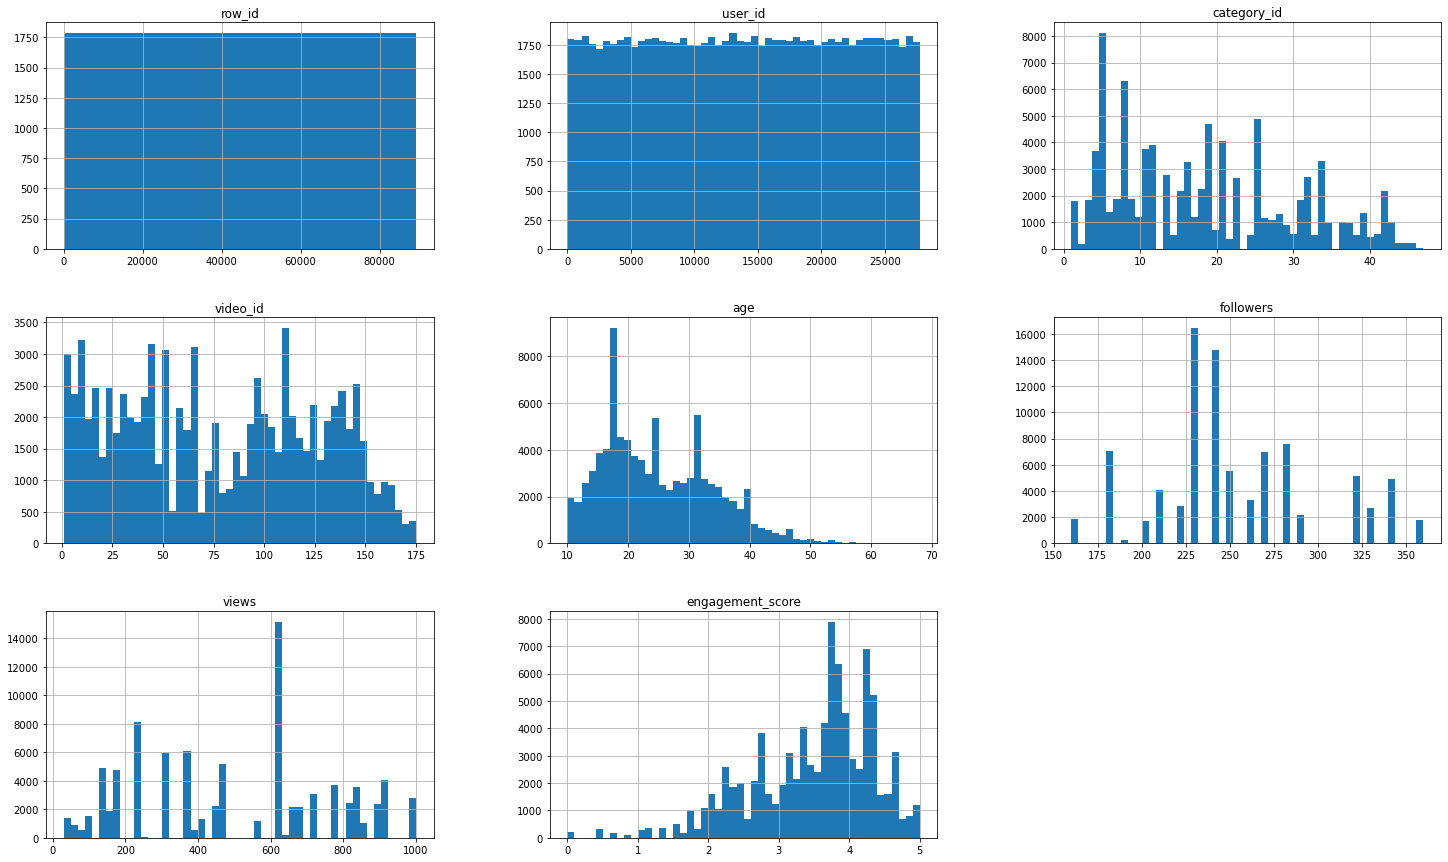

In [139]:
train.hist(bins=50,figsize=(25,15))
plt.show

### Correlation

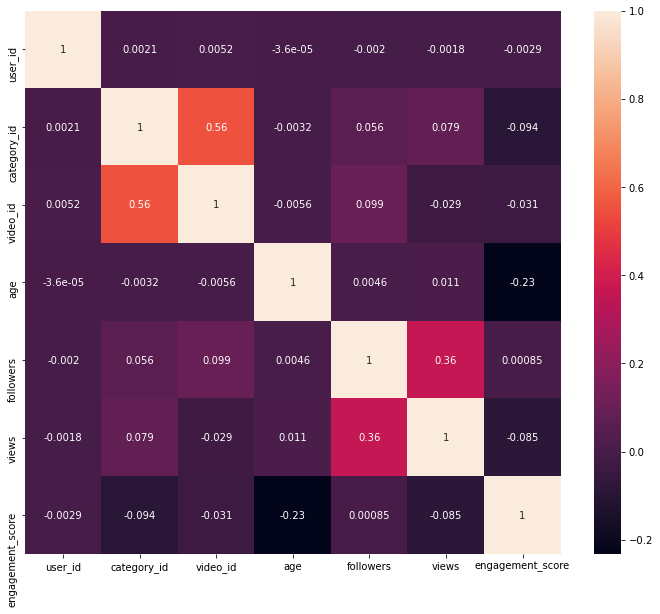

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

The correlation value within the variables is nearly equal to zero (except for category_id and video_id) it is 0.56(mild collinearity); We can conclude that there is no multicollinearity amongst variables


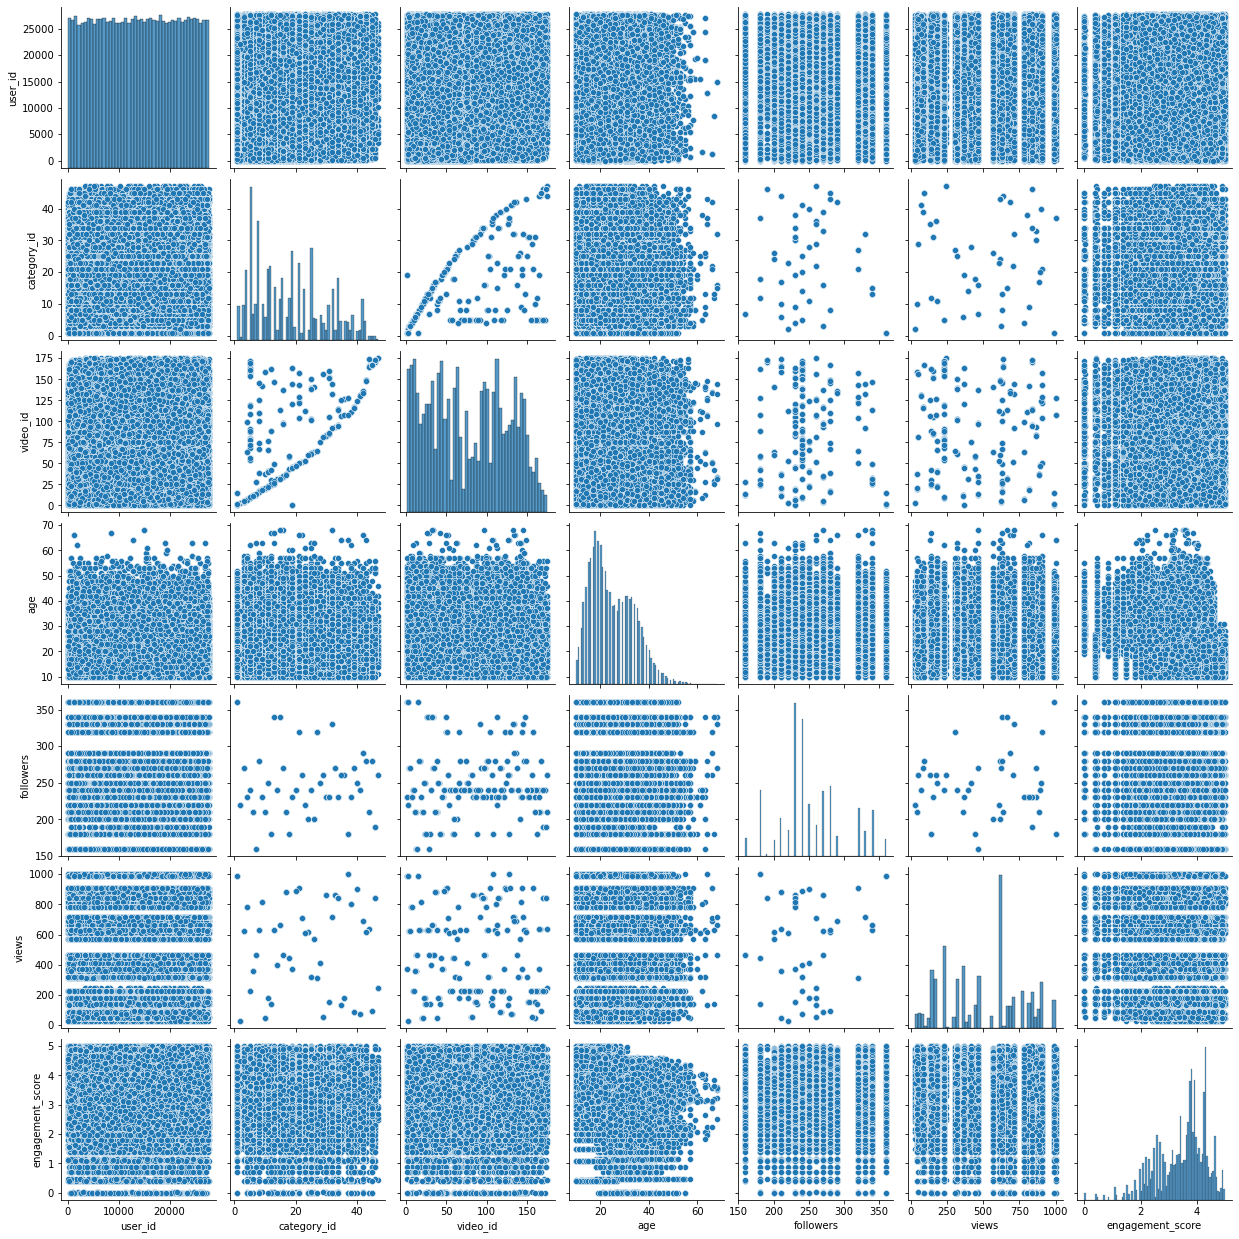

In [54]:
sns.pairplot(df_num)
plt.show()

### Creating features for model building

In [195]:
df_dum=pd.get_dummies(df_catg)


In [196]:
df_feat=pd.concat(objs=(df_num,df_dum),axis=1)

In [198]:
df_target=df_feat['engagement_score']
df_pred=df_feat.drop('engagement_score',axis=1)

### Prepare test data

In [197]:
#For test data
df_num_test=test.select_dtypes(include=[np.number])
df_catg_test=test.select_dtypes(include='object')

In [199]:
df_dum_t=pd.get_dummies(df_catg_test)


In [200]:
df_ft_test=pd.concat(objs=(df_num_test,df_dum_t),axis=1)

In [201]:
df_test=df_ft_test.drop('row_id',axis=1)

### Recursive Feature Elimination(RFE)  to select best features

In [202]:
x=df_pred

y=df_target
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 12)


rfe_model = rfe_model.fit(X_train, Y_train)


feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['user_id', 'category_id', 'video_id', 'age', 'followers', 'views',
       'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional'],
      dtype='object')


### XG BOOST Model

In [235]:
x=df_pred[signi_feat_rfe]
y=df_target
X_train_k,X_test_k,Y_train_k,Y_test_k=train_test_split(x,y,test_size=0.2,random_state=10)

In [236]:
model = xg.XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=9,
                      min_child_weight=1,
                      gamma=0.25, 
                      subsample= 1.0, 
                      colsample_bytree=0.68,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Training model
model.fit(X_train_k, Y_train_k)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=1.0, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [237]:
train_pred = model.predict(X_train_k)
train_score= r2_score(Y_train_k, train_pred)
print("Train Score :\t\t", round(train_score,2))
    
# Predicting for validation values and calculaing R2 score
val_pred= model.predict(X_test_k)
val_score= r2_score(Y_test_k, val_pred)
print("Validation Score :\t", round(val_score,2))

Train Score :		 0.49
Validation Score :	 0.38


### MODEL PERFORMANCE

In [238]:
mse_train = round(mean_squared_error(Y_train_k,train_pred),4)


print("Mean Squared Error (MSE) on training set: ", mse_train)


mse_test = round(mean_squared_error(Y_test_k,val_pred),4)


print("Mean Squared Error (MSE) on test set: ", mse_test)

rmse_train = round(np.sqrt(mse_train), 4)


print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Mean Squared Error (MSE) on training set:  0.3817
Mean Squared Error (MSE) on test set:  0.4514
Root Mean Squared Error (RMSE) on training set:  0.6178
Root Mean Squared Error (RMSE) on test set:  0.6719


In [242]:
submission = pd.read_csv('sample_submission.csv')
final_predictions =model.predict(df_test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('Lakshmi_submission_final.csv', index=False)

In [240]:
print('R2 score of XG Boost Model on given test data is',round(model.score(df_test,final_predictions),2))

R2 score of XG Boost Model on given test data is 1.0


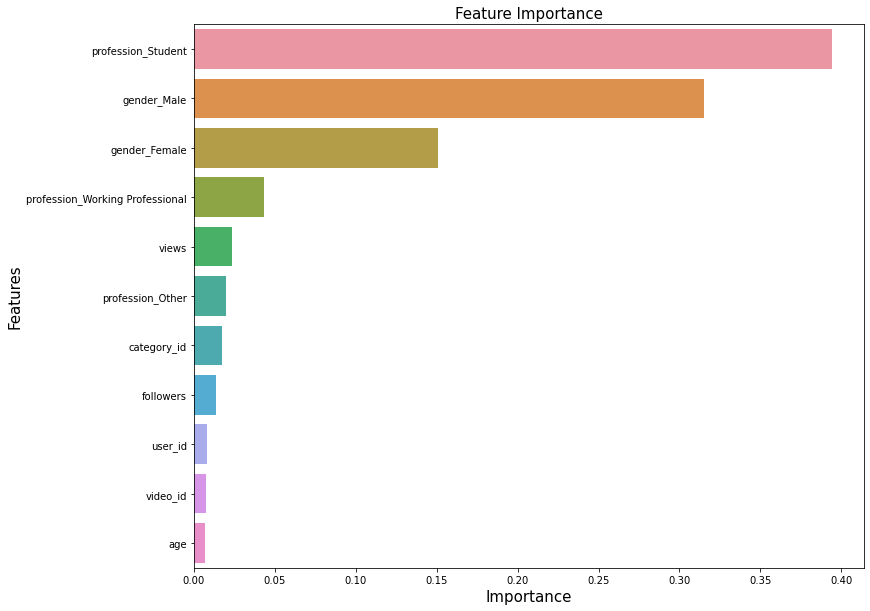

In [241]:
important_features = pd.DataFrame({'Features': X_train_k.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(12,10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


plt.show()

The important features contributing model is Gender,Profession,views,category_id,followers